# Ensemble Model

## preprocessing

In [1]:
#Random set
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import os

PROJECT_ROOT_DIR="."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"image",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path= os.path.join(IMAGES_PATH,fig_id+ "."+fig_extension)
    print("그림 저장:",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris=load_iris()

X=iris.data[:,2:]
y=iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(223.2, 362.4, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.6, 217.44, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 217.44, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(223.2, 72.47999999999996, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(446.4, 72.47999999999996, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

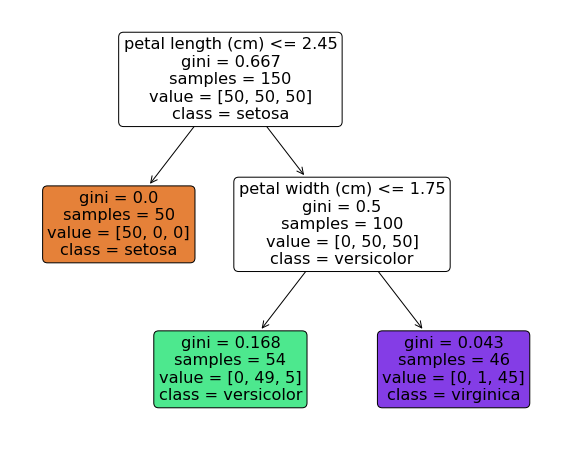

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(tree_clf, 
          filled=True,
         rounded=True,
         class_names=iris.target_names,
         feature_names=iris.feature_names[2:])
#여기서도 max_depth를 줄 수 있다..

# 트리모드는 너무 커지면 설명하기가 어려워진다.
#filled -> coloring

In [6]:
#gini : 지니 불순도.
#불순도가 낮아지도록. 순수 트리..?
#Gini Impurity -> Calculation from 'value'
# gini(0.168) = 1-((0/54)^2+(49/54)^2+(5/54)^2)

# Entropy 불순도도 알아야하나..

# CART 비용 함수.

In [7]:
#DecisionTreeClassfier(criterion='entropy')

Text(4.05, 0.5, '(Depth=2)')

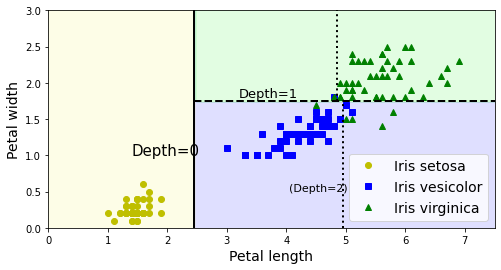

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
        print("not iris")
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",label="Iris setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",label="Iris vesicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],"g^",label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$",fontsize=18)
        plt.ylabel(r"$x_2$",fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right",fontsize=14)
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
plt.plot([2.45,2.45],[0,3],"k-",linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75],"k--",linewidth=2)
plt.plot([4.95,4.95],[0,1.75],"k:",linewidth=2)
plt.plot([4.85,4.85],[1.75,3],"k:",linewidth=2)
plt.text(1.40,1.0,"Depth=0",fontsize=15)
plt.text(3.2,1.8,"Depth=1",fontsize=13)
plt.text(4.05,0.5,"(Depth=2)",fontsize=11)


# 클래스와 클래스 확률 예측

In [9]:
tree_clf.predict_proba([[5,1.5]])
# 확률..? -> 확신의 정도

# Iris-Setosa : 0%
# Iris_Versicolor : 90.7%
# Iris-Virginica : 9.3%

# 해당 함수는 확신의 정도를 나타낸다. 
# 확신과 모델의 정확도가 같아지면 모델이 보정(Calibration)되었다고 한다.


array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5,1.5]])

array([1])

In [11]:
X[(X[:,1]==X[:,1][y==1].max()) & (y==1)] 
# wideset Iris varcicolor flower
# vesicolor 에서 width가 가장 큰 골라내기?s

array([[4.8, 1.8]])

In [12]:
#not_wideset_vesicolor = (X[:,1]!=1.8) | (y==2)
wideset_vesicolor = (X[:,1]==1.8) & (y==1)
#y==2 에서는 빼지말아야 하기 때문..

In [13]:
not_wideset_vesicolor=~wideset_vesicolor

In [14]:
X_tweaked = X[not_wideset_vesicolor]
y_tweaked = y[not_wideset_vesicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked,y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

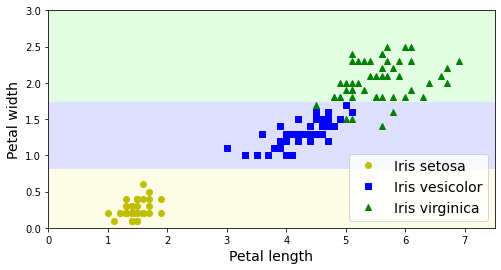

In [15]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked,X_tweaked,y_tweaked)
#plt.plot([2.45,2.45],[0,3],"k-",linewidth=2)
#plt.plot([2.45,7.5],[1.75,1.75],"k--",linewidth=2)
#plt.plot([4.95,4.95],[0,1.75],"k:",linewidth=2)
#plt.plot([4.85,4.85],[1.75,3],"k:",linewidth=2)
#plt.text(1.40,1.0,"Depth=0",fontsize=15)
#plt.text(3.2,1.8,"Depth=1",fontsize=13)
#plt.text(4.05,0.5,"(Depth=2)",fontsize=11)
plt.show()

not iris
not iris


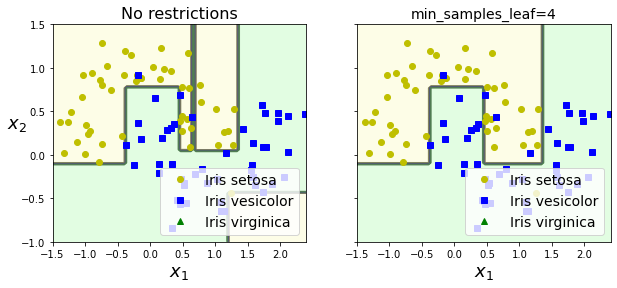

In [16]:
from sklearn.datasets import make_moons
Xm,ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
# min_samples_leaf : 제약인데,,
# leaf가 너무 많아지지 않도록...? 트리 성장을 규제함..

deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf2.min_samples_leaf),fontsize=14)
plt.ylabel("")

plt.show()

not iris


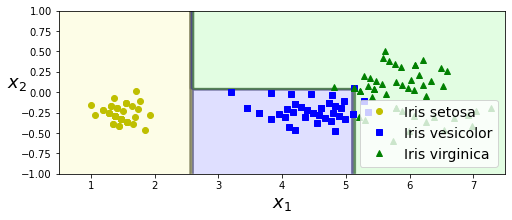

In [17]:
angle = np.pi/180*20

rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle),np.cos(angle)]])

Xr= X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr,y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r,Xr, y, axes=[0.5, 7.5,-1.0,1],iris=False)

plt.show()

not iris
not iris


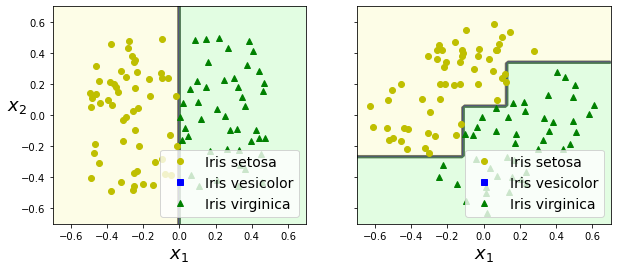

In [18]:
np.random.seed(6)

Xs= np.random.rand(100,2)-0.5
ys=(Xs[:,0] > 0).astype(np.float32)*2

angle = np.pi / 4
# this mean 45degree rotation

rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle),np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs,ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr,Xsr,ys,axes=[-0.7,0.7,-0.7,0.7], iris=False)

plt.ylabel("")

plt.show()

# 회귀 트리

In [19]:
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2 # 2차방정식
y=y+np.random.randn(m,1)/10

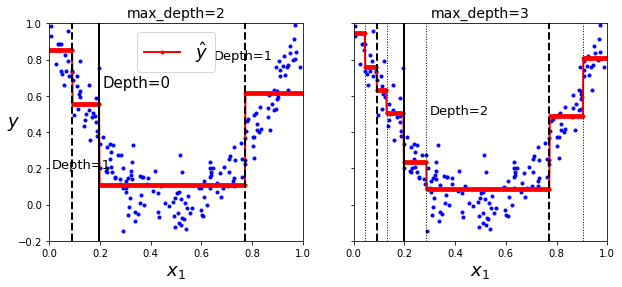

In [47]:
from sklearn.tree import DecisionTreeRegressor

#depth -> 2, 3
tree_reg1 = DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42,max_depth=3)

tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0,1,-0.2,1], ylabel="$y$"):
    x1= np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$",fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18,rotation=0)
    plt.plot(X,y,"b.")
    plt.plot(x1, y_pred, "r.-",linewidth=2,label=r"$\hat{y}$")
    
fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1,X,y)
for split, style in ((0.1973,"k-"), (0.0917,"k--"),(0.7718,"k--")):
    plt.plot([split,split],[-0.2,1],style,linewidth=2)
    
plt.text(0.21,0.65,"Depth=0",fontsize=15)
plt.text(0.01,0.2,"Depth=1",fontsize=13)
plt.text(0.65,0.8,"Depth=1",fontsize=13)
plt.legend(loc="upper center",fontsize=18)
plt.title("max_depth=2",fontsize=14)




plt.sca(axes[1])
plot_regression_predictions(tree_reg2,X,y, ylabel=None)
for split, style in ((0.1973,"k-"), (0.0917,"k--"),(0.7718,"k--")):
    plt.plot([split,split],[-0.2,1],style,linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split],[-0.2,1],"k:",linewidth=1)
#plt.text(0.21,0.65,"Depth=0",fontsize=15)
#plt.text(0.01,0.2,"Depth=1",fontsize=13)
#plt.text(0.65,0.8,"Depth=1",fontsize=13)
plt.text(0.3,0.5,"Depth=2",fontsize=13)

#plt.legend(loc="upper center",fontsize=18)
plt.title("max_depth=3",fontsize=14)

plt.show()


[Text(279.0, 362.4, 'x1 <= 0.197\nmse = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(139.5, 217.44, 'x1 <= 0.092\nmse = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(69.75, 72.47999999999996, 'mse = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(209.25, 72.47999999999996, 'mse = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(418.5, 217.44, 'x1 <= 0.772\nmse = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(348.75, 72.47999999999996, 'mse = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(488.25, 72.47999999999996, 'mse = 0.036\nsamples = 46\nvalue = 0.615')]

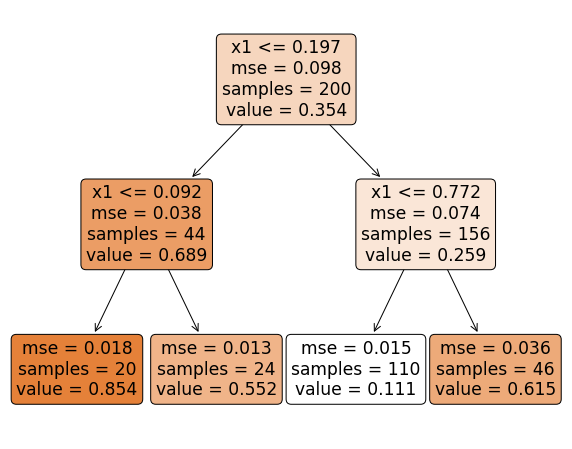

In [49]:
plt.figure(figsize=(10,8))
plot_tree(tree_reg1, 
          filled=True,
         rounded=True,
         feature_names=["x1"])
